In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir

In [ ]:
import keras
from keras.preprocessing import image
from keras import backend as K
from keras.layers import Input
from keras.optimizers import Adam

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, concatenate, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D, AveragePooling2D

In [ ]:
dir_root = "/content/drive/My Drive/Dataset/tomato/"
# plant_root = "/content/drive/My Drive/Dataset/tomato/train/"
# tomato_dir = os.listdir("/content/drive/My Drive/Dataset/tomato/train/")

In [ ]:
# list_disease = []
# for i in tomato_dir :
#   list_disease.append(i)
# list_disease

In [ ]:
# total_label = []
# for i in range(0,10) :
#   total_label.append(len(listdir(os.path.join(plant_root, list_disease[i]))))
# total_label

In [ ]:
# plt.figure(figsize=(35,10))
# plt.bar(list_disease, total_label)
# plt.title('Information Total Image in Class')
# plt.xlabel('Class')
# plt.ylabel('Total')
# plt.show()

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
default_image_size = tuple((299, 299))

image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(dir_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{dir_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{dir_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{dir_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    %time print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Image loading completed
CPU times: user 102 µs, sys: 0 ns, total: 102 µs
Wall time: 107 µs


In [ ]:
len(image_list)

2000

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np_image_list,
    image_labels,
    test_size=0.3,
    random_state = 42)

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1400, 600, 1400, 600)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range = 0.2)

In [ ]:
resultAug = aug.flow(x_train[0:5], y_train[0:5], batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


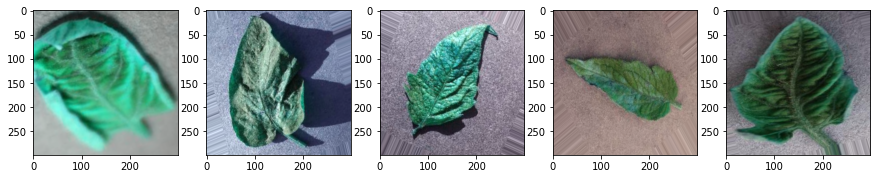

In [ ]:
fig = plt.figure(figsize=(15,15), num=None)
x = resultAug.next()
a = x[0]

ax = fig.add_subplot(1, 5, 1)
plt.imshow(a[0])

ax = fig.add_subplot(1, 5, 2)
plt.imshow(a[1])

ax = fig.add_subplot(1, 5, 3)
plt.imshow(a[2])

ax = fig.add_subplot(1, 5, 4)
plt.imshow(a[3])

ax = fig.add_subplot(1, 5, 5)
plt.imshow(a[4])

plt.show()

In [ ]:
def inception_block_A(inputs):
  branch_1 = conv2d_bn(inputs, kernel_size=(1,1), filters=64, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1,kernel_size=(3,3), filters=96, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(3,3), filters=96, strides = 1, padding="same")

  branch_2 = conv2d_bn(inputs, kernel_size=(1,1), filters=64, strides = 1, padding="same")
  branch_2 = conv2d_bn(branch_2, kernel_size=(3,3), filters=96, strides = 1, padding="same")

  branch_3 = conv2d_bn(inputs, kernel_size=(1,1), filters=96, strides = 1, padding="same")

  branch_4 = AveragePooling2D((3,3), strides = 1, padding="same")(inputs)
  branch_4 = conv2d_bn(branch_4, kernel_size=(1,1), filters=96, strides = 1, padding="same")
  output   =  concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)

  return output

def inception_block_B(inputs):
  branch_1 = conv2d_bn(inputs, kernel_size=(1,1), filters=192, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(1,7), filters=192, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(7,1), filters=224, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(1,7), filters=224, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(7,1), filters=256, strides = 1, padding="same")


  branch_2 = conv2d_bn(inputs, kernel_size=(1,1), filters=192, strides = 1, padding="same")
  branch_2 = conv2d_bn(branch_2, kernel_size=(1,7), filters=224, strides = 1, padding="same")
  branch_2 = conv2d_bn(branch_2, kernel_size=(1,7), filters=256, strides = 1, padding="same")


  branch_3 = conv2d_bn(inputs, kernel_size=(1,1), filters=384, strides = 1, padding="same")

  branch_4 = AveragePooling2D((3,3), strides = 1, padding="same")(inputs)
  branch_4 = conv2d_bn(branch_4, kernel_size=(1,1), filters=128, strides = 1, padding="same")
  output =  concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)

  return output

def inception_block_C(inputs):
  branch_1 = conv2d_bn(inputs, kernel_size=(1,1), filters=384, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(1,3), filters=448, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(3,1), filters=512, strides = 1, padding="same")
  branch_1_1 = conv2d_bn(branch_1, kernel_size=(1,3), filters=256, strides = 1, padding="same")
  branch_1_2 = conv2d_bn(branch_1, kernel_size=(3,1), filters=256, strides = 1, padding="same")

  branch_2 = conv2d_bn(inputs, kernel_size=(1,1), filters=384, strides = 1, padding="same")
  branch_2_1 = conv2d_bn(branch_2, kernel_size=(3,1), filters=256, strides = 1, padding="same")
  branch_2_2 = conv2d_bn(branch_2, kernel_size=(1,3), filters=256, strides = 1, padding="same")

  branch_3 = conv2d_bn(inputs, kernel_size=(1,1), filters=256, strides = 1, padding="same")

  branch_4 = AveragePooling2D((3,3), strides = 1, padding="same")(inputs)
  branch_4 = conv2d_bn(branch_4, kernel_size=(1,1), filters=256, strides = 1, padding="same")
  output =  concatenate([branch_1_1, branch_1_2, branch_2_1, branch_2_2 , branch_3, branch_4], axis=-1)

  return output

def reduction_block_A(inputs):
  branch_1 = conv2d_bn(inputs, kernel_size=(1,1), filters=192, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(3,3), filters=224, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(3,3), filters=256, strides = 2, padding="valid")
   
  branch_2 = conv2d_bn(inputs, kernel_size=(3,3), filters=384, strides = 2, padding="valid")

  branch_3 = AveragePooling2D((3,3), strides = 2)(inputs)
  output =  concatenate([branch_1, branch_2, branch_3], axis=-1)

  return output

def reduction_block_B(inputs):
  branch_1 = conv2d_bn(inputs, kernel_size=(1,1), filters=256, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(1,7), filters=256, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(7,1), filters=320, strides = 1, padding="same")
  branch_1 = conv2d_bn(branch_1, kernel_size=(3,3), filters=320, strides = 2, padding="valid")

  branch_2 = conv2d_bn(inputs, kernel_size=(1,1), filters=192, strides = 1, padding="same")
  branch_2 = conv2d_bn(branch_2, kernel_size=(3,3), filters=192, strides = 2, padding="valid")

  branch_3 = AveragePooling2D((3,3), strides = 2)(inputs)

  output =  concatenate([branch_1, branch_2, branch_3], axis=-1)

  return output


def inception_block(inception_type, inputs):
  if inception_type == "A":
    return inception_block_A(inputs)
  if inception_type == "B":
    return inception_block_B(inputs)
  if inception_type == "C":
    return inception_block_C(inputs)

def conv2d_bn(inputs ,filters, kernel_size, padding, strides):
  inputs = Conv2D(filters, kernel_size, strides=strides, padding=padding)(inputs)
  inputs = BatchNormalization(axis = 3)(inputs)
  outputs = Activation('relu')(inputs)
  return outputs

In [ ]:
inputs = Input(shape=(299, 299, 3))  

x = conv2d_bn(inputs, kernel_size=(3,3), filters=32, strides=2, padding="valid")
x = conv2d_bn(x, kernel_size=(3,3), filters=32, strides=1, padding="valid")
x = conv2d_bn(x, kernel_size=(3,3), filters=64, strides=1, padding="same")
x_1 = MaxPooling2D((3,3), strides = 2)(x)
x_2 = conv2d_bn(x, kernel_size=(3,3), filters=96, strides=2, padding="valid")
x = concatenate([x_1, x_2], axis=-1)
x_1 = conv2d_bn(x, kernel_size=(1,1), filters=64, strides=1, padding="same")
x_1 = conv2d_bn(x_1, kernel_size=(3,3), filters=96, strides=1, padding="valid")
x_2 = conv2d_bn(x, kernel_size=(1,1), filters=64, strides=1, padding="same")
x_2 = conv2d_bn(x_2, kernel_size=(7,1), filters=64, strides=1, padding="same")
x_2 = conv2d_bn(x_2, kernel_size=(1,7), filters=64, strides=1, padding="same")
x_2 = conv2d_bn(x_2, kernel_size=(3,3), filters=96, strides=1, padding="valid")
x = concatenate([x_1, x_2], axis=-1)
x_1 = conv2d_bn(x, kernel_size=(3,3), filters=192, strides=2, padding="valid")
x_2 = MaxPooling2D((3,3), strides = 2)(x)
x = concatenate([x_1, x_2], axis=-1)

inception_A  = inception_block("A", x)
for i in range(3): inception_A  = inception_block("A", inception_A)

reduction_A  = reduction_block_A(inception_A)

inception_B  = inception_block("B", reduction_A)
for i in range(6):inception_B  = inception_block("B", inception_B)

reduction_B  = reduction_block_B(inception_B)

inception_C  = inception_block("C", reduction_B)
inception_C = inception_block("C", inception_C)
inception_C = inception_block("C", inception_C)

global_pool = AveragePooling2D((8,8), padding='valid')(inception_C)
dense = Dropout(0.8)(global_pool)
dense = Flatten()(dense)
output = Dense(10, activation='softmax')(dense)

model = Model(inputs, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.85):
      self.model.stop_training = True

stopProcces = Callback()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

In [ ]:
t_steps = len(x_train) // 32

In [ ]:
procces = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test,y_test),
    steps_per_epoch=t_steps,
    epochs=150,
    verbose=1,
    callbacks=[stopProcces])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
43/43 [==============================] - 103s 1s/step - loss: 2.8408 - accuracy: 0.1089 - val_loss: 2.5093 - val_accuracy: 0.1100
Epoch 2/150
43/43 [==============================] - 46s 1s/step - loss: 2.2445 - accuracy: 0.2398 - val_loss: 3.6317 - val_accuracy: 0.1100
Epoch 3/150
43/43 [==============================] - 47s 1s/step - loss: 1.8624 - accuracy: 0.2783 - val_loss: 5.8831 - val_accuracy: 0.1100
Epoch 4/150
43/43 [==============================] - 47s 1s/step - loss: 1.6954 - accuracy: 0.3434 - val_loss: 10.4875 - val_accuracy: 0.1100
Epoch 5/150
43/43 [==============================] - 47s 1s/step - loss: 1.6469 - accuracy: 0.3868 - val_loss: 13.6477 - val_accuracy: 0.1100
Epoch 6/150
43/43 [==============================] - 47s 1s/step - loss: 1.5881 - accuracy: 0.4274 - val_loss: 7.9696 - val_accuracy: 0.1100
Epoch 7/150
43/43 [==============================] - 47s 1s/step - loss: 1.4666 - accuracy: 0.4595 - val_loss: 8.5089 - val_accuracy: 0.1067
Epoch 8/15

In [ ]:
scores = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 5s 267ms/step - loss: 0.3500 - accuracy: 0.9000
Test Accuracy: 89.99999761581421


In [ ]:
# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=False, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )

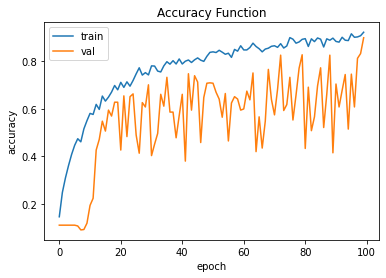

In [ ]:
import matplotlib.pyplot as plt

accuracy = procces.history['accuracy']
val_accuracy = procces.history['val_accuracy']

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy Function')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

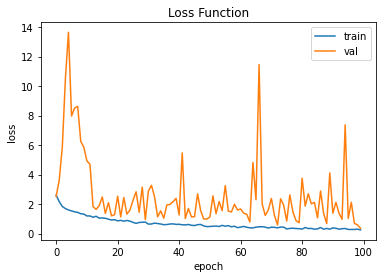

In [ ]:
loss = procces.history['loss']
val_loss = procces.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss Function')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

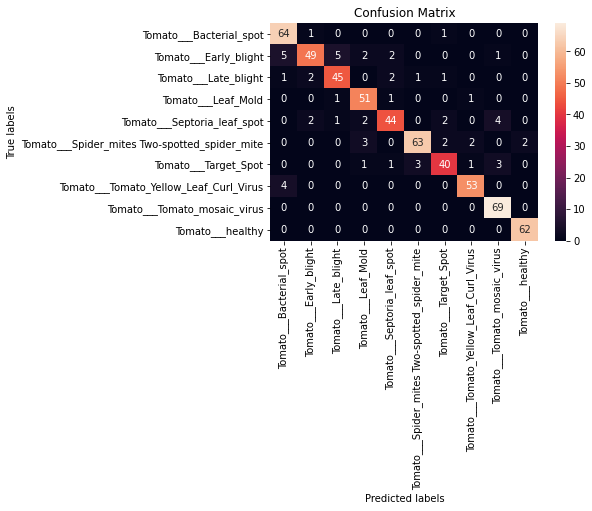

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)

cm = confusion_matrix(y_test2,pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(label_binarizer.classes_,rotation=90); ax.yaxis.set_ticklabels(label_binarizer.classes_,rotation=0);

In [ ]:
model_pred = model.predict(x_test)

In [ ]:
label_binarizer.classes_

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

In [ ]:
from itertools import cycle
from sklearn import metrics

class_label_map = { 0:'Tomato___Bacterial_spot', 1:'Tomato___Early_blight', 2:'Tomato___Late_blight', 3:'Tomato___Leaf_Mold',
                   4:'Tomato___Septoria_leaf_spot', 5:'Tomato___Spider_mites Two-spotted_spider_mite', 6:'Tomato___Target_Spot',
                   7:'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8:'Tomato___Tomato_mosaic_virus', 9:'Tomato___healthy'}
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,1], model_pred[:,1])
  roc_auc[1] = metrics.auc(fpr[i], tpr[i])

plt.figure()
lw = 5

colors = cycle(['purple', 'lightgreen', 'lightblue', 'orange', 'aqua', 'darkorange', 'cornflowerblue', 'darkred', 'grey', 'forestgreen'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_label_map[i]))
  i=i+1

plt.plot([0,1], [0,1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC-AUC for multi-class')
plt.legend(loc="lower right")
plt.show

NameError: ignored